In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [2]:
# reading the csv file
data = pd.read_csv('train.csv')

In [3]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [4]:
# looking at first five rows of the data
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [5]:
# distribution of classes in the dataset
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [10]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data['class']

In [11]:
# shape of the image
X.shape

(12196, 224, 224, 3)

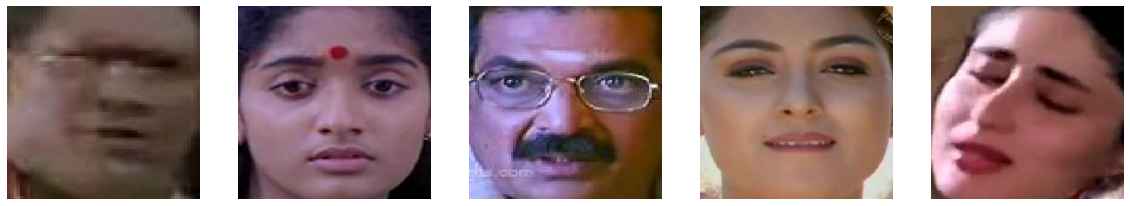

In [12]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [13]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [14]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [15]:
# normalizing the pixel values
X = X / X.max()

In [16]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

In [17]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [18]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

In [19]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               15052900  
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 [==============================] - 12s 172ms/step - loss: 0.6676 - accuracy: 0.6220 - val_loss: 0.5869 - val_accuracy: 0.7182
Epoch 2/50
67/67 [==============================] - 6s 97ms/step - loss: 0.5989 - accuracy: 0.6813 - val_loss: 0.6117 - val_accuracy: 0.6638
Epoch 3/50
67/67 [==============================] - 7s 100ms/step - loss: 0.5691 - accuracy: 0.7061 - val_loss: 0.6056 - val_accuracy: 0.6750
Epoch 4/50
67/67 [==============================] - 7s 106ms/step - loss: 0.5554 - accuracy: 0.7121 - val_loss: 0.5275 - val_accuracy: 0.7371
Epoch 5/50
67/67 [==============================] - 7s 108ms/step - loss: 0.5297 - accuracy: 0.7355 - val_loss: 0.5115 - val_accuracy: 0.7554
Epoch 6/50
67/67 [==============================] - 8s 119ms/step - loss: 0.5248 - accuracy: 0.7460 - val_loss: 0.5100 - val_accuracy: 0.7439
Epoch 7/50
67/67 [==============================] - 7s 107ms/step - loss: 0.5257 - accuracy: 0.7430 - val_loss: 0.5042 - val_accuracy: 0.7557
Epoch 

In [33]:
# getting predictions in the form of class as well as probabilities
predictions = np.argmax(model.predict(X_valid),axis=1)
prediction_probabilities = model.predict(X_valid)[:, 0]

115/115 [==============================] - 2s 18ms/step


In [34]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.4842853238589779 %


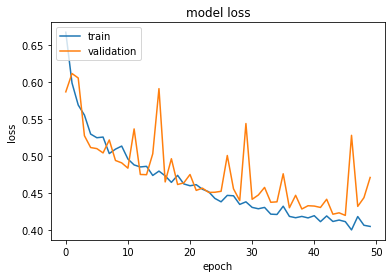

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

Model is 94 % sure that it is emergency


KeyError: 1294

# Change number of hidden layers in FC

In [40]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [41]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               15052900  
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [42]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 [==============================] - 15s 202ms/step - loss: 0.6527 - accuracy: 0.6177 - val_loss: 0.6077 - val_accuracy: 0.7043
Epoch 2/50
67/67 [==============================] - 6s 91ms/step - loss: 0.5934 - accuracy: 0.6965 - val_loss: 0.5688 - val_accuracy: 0.7240
Epoch 3/50
67/67 [==============================] - 6s 95ms/step - loss: 0.5611 - accuracy: 0.7234 - val_loss: 0.5552 - val_accuracy: 0.7166
Epoch 4/50
67/67 [==============================] - 6s 94ms/step - loss: 0.5515 - accuracy: 0.7233 - val_loss: 0.5571 - val_accuracy: 0.7057
Epoch 5/50
67/67 [==============================] - 6s 94ms/step - loss: 0.5392 - accuracy: 0.7294 - val_loss: 0.5457 - val_accuracy: 0.7327
Epoch 6/50
67/67 [==============================] - 6s 93ms/step - loss: 0.5311 - accuracy: 0.7375 - val_loss: 0.5099 - val_accuracy: 0.7477
Epoch 7/50
67/67 [==============================] - 6s 93ms/step - loss: 0.5209 - accuracy: 0.7437 - val_loss: 0.5036 - val_accuracy: 0.7595
Epoch 8/50


In [49]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.argmax(model.predict(X_valid),axis=1)), '%')




115/115 [==============================] - 9s 75ms/step
Accuracy on validation set: 0.4842853238589779 %


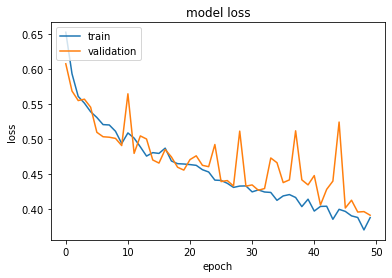

In [50]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

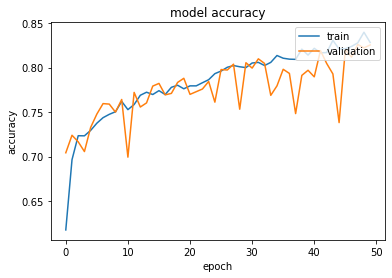

In [51]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Changing number of neurons in hidden layers


In [55]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(115, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [56]:
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 115)               17310835  
                                                                 
 dense_10 (Dense)            (None, 1)                 116       
                                                                 
Total params: 17,310,951
Trainable params: 17,310,951
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 [==============================] - 26s 385ms/step - loss: 0.6712 - accuracy: 0.6184 - val_loss: 0.8150 - val_accuracy: 0.5067
Epoch 2/50
67/67 [==============================] - 7s 107ms/step - loss: 0.5963 - accuracy: 0.6861 - val_loss: 0.5970 - val_accuracy: 0.6638
Epoch 3/50
67/67 [==============================] - 7s 104ms/step - loss: 0.5636 - accuracy: 0.7100 - val_loss: 0.5372 - val_accuracy: 0.7387
Epoch 4/50
67/67 [==============================] - 7s 103ms/step - loss: 0.5590 - accuracy: 0.7191 - val_loss: 0.5454 - val_accuracy: 0.7327
Epoch 5/50
67/67 [==============================] - 7s 102ms/step - loss: 0.5358 - accuracy: 0.7343 - val_loss: 0.5155 - val_accuracy: 0.7535
Epoch 6/50
67/67 [==============================] - 7s 104ms/step - loss: 0.5218 - accuracy: 0.7411 - val_loss: 0.5023 - val_accuracy: 0.7595
Epoch 7/50
67/67 [==============================] - 7s 103ms/step - loss: 0.5268 - accuracy: 0.7411 - val_loss: 0.5118 - val_accuracy: 0.7538
Epoch

In [64]:
y_valid.head()

5701     0
11455    1
9428     0
2221     0
429      0
Name: class, dtype: int64

In [70]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype("int32")))

115/115 [==============================] - 2s 20ms/step
Accuracy on validation set: 0.8147034708936868


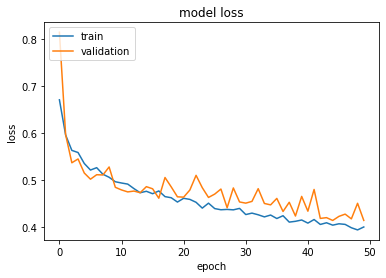

In [59]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

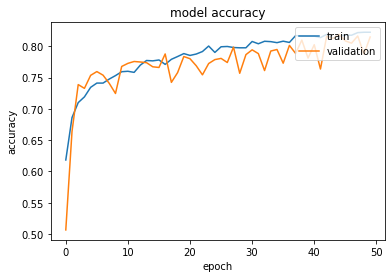

In [60]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Changing optimizers

In [71]:
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [73]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [74]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [75]:
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [76]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 [==============================] - 13s 145ms/step - loss: 0.6423 - accuracy: 0.6609 - val_loss: 0.6128 - val_accuracy: 0.7040
Epoch 2/100
67/67 [==============================] - 9s 128ms/step - loss: 0.5934 - accuracy: 0.7124 - val_loss: 0.5810 - val_accuracy: 0.7270
Epoch 3/100
67/67 [==============================] - 8s 124ms/step - loss: 0.5677 - accuracy: 0.7334 - val_loss: 0.5643 - val_accuracy: 0.7365
Epoch 4/100
67/67 [==============================] - 8s 123ms/step - loss: 0.5547 - accuracy: 0.7375 - val_loss: 0.5533 - val_accuracy: 0.7300
Epoch 5/100
67/67 [==============================] - 8s 126ms/step - loss: 0.5403 - accuracy: 0.7476 - val_loss: 0.5447 - val_accuracy: 0.7354
Epoch 6/100
67/67 [==============================] - 8s 126ms/step - loss: 0.5304 - accuracy: 0.7532 - val_loss: 0.5317 - val_accuracy: 0.7535
Epoch 7/100
67/67 [==============================] - 8s 126ms/step - loss: 0.5234 - accuracy: 0.7564 - val_loss: 0.5246 - val_accuracy: 0.752

KeyboardInterrupt: 

In [78]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype("int32"), '%'))

SyntaxError: unexpected EOF while parsing (3459764249.py, line 2)

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Changing Activation function


In [79]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [80]:
# summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [81]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
67/67 [==============================] - 25s 365ms/step - loss: 0.6964 - accuracy: 0.6489 - val_loss: 0.5816 - val_accuracy: 0.7133
Epoch 2/50
67/67 [==============================] - 8s 123ms/step - loss: 0.5624 - accuracy: 0.7210 - val_loss: 0.5576 - val_accuracy: 0.7338
Epoch 3/50
67/67 [==============================] - 8s 120ms/step - loss: 0.5433 - accuracy: 0.7405 - val_loss: 0.5381 - val_accuracy: 0.7390
Epoch 4/50
67/67 [==============================] - 8s 121ms/step - loss: 0.5313 - accuracy: 0.7503 - val_loss: 0.5328 - val_accuracy: 0.7524
Epoch 5/50
67/67 [==============================] - 8s 119ms/step - loss: 0.5223 - accuracy: 0.7524 - val_loss: 0.5219 - val_accuracy: 0.7508
Epoch 6/50
67/67 [==============================] - 8s 119ms/step - loss: 0.5159 - accuracy: 0.7602 - val_loss: 0.5174 - val_accuracy: 0.7535
Epoch 7/50
67/67 [==============================] - 8s 118ms/step - loss: 0.5149 - accuracy: 0.7554 - val_loss: 0.5233 - val_accuracy: 0.7573
Epoch

In [85]:
y_pred = model.predict((X_valid) > 0.5)*1

115/115 [==============================] - 2s 21ms/step


In [90]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, (model.predict(X_valid) > 0.5).astype("int32")) , '%')

115/115 [==============================] - 2s 18ms/step
Accuracy on validation set: 0.7851872096201148 %


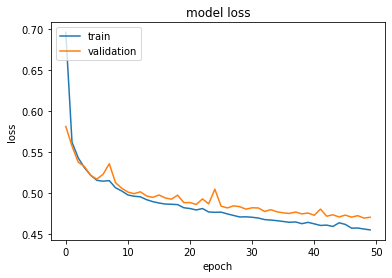

In [91]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Changing Epoch

In [ ]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

In [ ]:
model_history = model.fit(X_train, y_train, epochs=40, batch_size=128,validation_data=(X_valid,y_valid))

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Test Data

In [141]:
testdata = pd.read_csv('test_fkwGUNG.csv')

In [142]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [145]:
len(testdata)

5227

In [143]:
testdata.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [147]:
# load images and store it in numpy array

# empty list to store the images
Xtest = []
# iterating over each image
for img_name in testdata.image_names:
    # loading the image using its name
    img = plt.imread('images/' + img_name)
    # saving each image in the list
    Xtest.append(img)
    
# converting the list of images into array
Xtest=np.array(X)

In [149]:
len(Xtest)

4112

In [150]:
# shape of the image
Xtest.shape

(4112, 224, 224, 3)

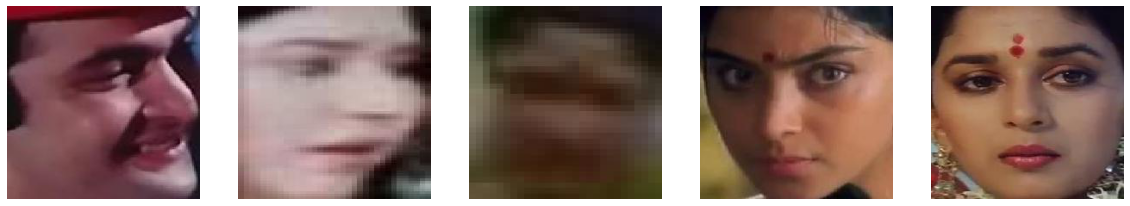

In [151]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(Xtest[i*400])
    ax[i].axis('off')

In [152]:
# converting 3 dimensional image to 1 dimensional image
Xtest = Xtest.reshape(Xtest.shape[0], 224*224*3)
Xtest.shape

(4112, 150528)

In [153]:
# minimum and maximum pixel values of images
Xtest.min(), Xtest.max()

(0, 255)

In [154]:
# normalizing the pixel values
Xtest = Xtest / Xtest.max()

In [155]:
# minimum and maximum pixel values of images after normalizing
Xtest.min(), Xtest.max()

(0.0, 1.0)

In [129]:
predictionstest2 = (model.predict(Xtest) > 0.5).astype("int32")

129/129 [==============================] - 2s 18ms/step


In [130]:
predictionstest2

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [144]:
df2 = pd.DataFrame(predictionstest2, columns = ['class'])

In [138]:
df_col_merged_final_1 = pd.concat([testdata, df1], axis=1)

In [140]:
df_col_merged_final_1.to_csv('lokesh_gender_classify.csv')

In [139]:
df_col_merged_final_1

,image_names,class
0,5603.jpg,1.0
1,1286.jpg,1.0
2,9815.jpg,0.0
3,8865.jpg,1.0
4,9306.jpg,0.0
...,...,...
5222,13040.jpg,NaN
5223,1335.jpg,NaN
5224,11246.jpg,NaN
5225,9052.jpg,NaN
